In [1]:
import os
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Declare variables
NEEDLE = 'images/reference/gauge-needle.png'
GAUGE = 'images/reference/gauge-dial.png'

NEEDLE_ZERO = 'images/reference/gauge-needle_rot_0.png'

## Synthetic Images - Correct Needle placement
* Determine what angle the needle needs to be set to in order to display at the 0 gauge number.

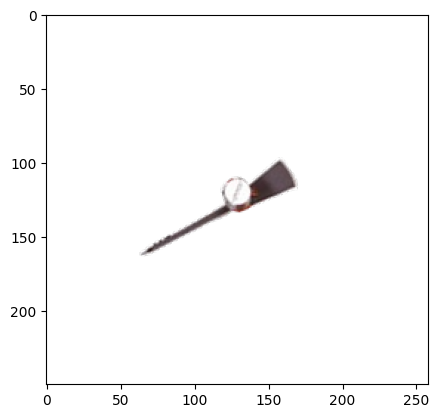

In [3]:
image = Image.open(NEEDLE).convert('RGBA')

# 40 ---> 0 C
# 160 ---> 150 C

image_rot_0 = image.rotate(40, expand=False, resample=Image.BICUBIC) # adjust this value to rotate the needle to the starting (zero) position
image_rot_0.save(NEEDLE_ZERO)
plt.imshow(image_rot_0)
plt.show()

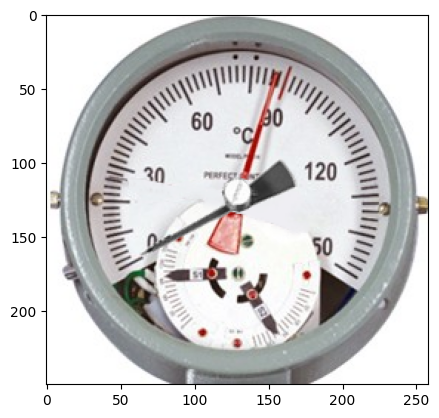

In [4]:
# Gauge background
image = Image.open(GAUGE).convert('RGBA')
gauge_zero = image.copy()
gauge_zero.paste(image_rot_0.convert('L'), (0, 0), image_rot_0.convert('RGBA'))
    
plt.imshow(gauge_zero)
plt.show()

### Needle image manipulation and rotation

In [5]:
# Rotate all the images of needles 360 degrees
PATH = "images/generated/needles/needle_rot_{0}.png"
def make_needles(angle):
    img = Image.open(NEEDLE_ZERO)
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(box=(x.size[0]/2 - img.size[0]/2,
               x.size[1]/2 - img.size[1]/2,
               x.size[0]/2 + img.size[0]/2,
               x.size[1]/2 + img.size[1]/2))
    
    dash = str(angle).replace(".","-")
    filename = PATH.format(dash)

    x.save(filename)

# Generate needle images for 0 to 150 reading (each step = 1.8 degrees)
for reading in range(0, 151):  # inclusive
    angle = round(reading * 1.8, 1)
    make_needles(angle)

### Generate synthetic gauges

In [6]:
NEEDLES_PATH = "./images/generated/needles/needle_rot_{0}.png"
EDA_GAUGES = "./images/generated/gauges/{0}"

def save_gauge(item, num):
    img_gauge = Image.open(GAUGE, 'r')

    filename = NEEDLES_PATH.format(str(item).replace(".","-"))
    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert('L'), (0, 0), img_needle.convert('RGBA'))
    
    # Save the synthetic image to the class folder
    string_num = str(num)
    dash = string_num.replace(".","-")

    # Save PNG for EDA
    eda_name = "gauge_{0}.png".format(dash)
    img_copy.save(EDA_GAUGES.format(eda_name))

def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        save_gauge(mapping[item], item)

In [7]:
# Define a mapping between degrees in circle and gauge readings

# adjust this according to your gauge (value:angle)
# gaugeDegreeMap = {
#     0.0:0.0,  0.1:4.5, 0.2:9.0, 0.3:13.5, 0.4:18.0, 0.5:22.5, 0.6:27.0, 0.7:31.5, 0.8:36.0, 0.9:40.5, 
#     1.0:45.0, 1.1:49.5, 1.2:54.0, 1.3:58.5, 1.4:63.0, 1.5:67.5, 1.6:72.0, 1.7:76.5, 1.8:81.0, 1.9:85.5, 
#     2.0:90.0, 2.1:94.5, 2.2:99.0, 2.3:103.5, 2.4:108.0, 2.5:112.5, 2.6:117.0, 2.7:121.5, 2.8:126.0, 2.9:130.5, 
#     3.0:135.0, 3.1:139.5, 3.2:144.0, 3.3:148.5, 3.4:153.0, 3.5:157.5, 3.6:162.0, 3.7:166.5, 3.8:171.0, 3.9:175.5, 
#     4.0:180.0, 4.1:184.5, 4.2:189.0, 4.3:193.5, 4.4:198.0, 4.5:202.5, 4.6:207.0, 4.7:211.5, 4.8:216.0, 4.9:220.5, 
#     5.0:225.0, 5.1:229.5, 5.2:234.0, 5.3:238.5, 5.4:243.0, 5.5:247.5, 5.6:252.0, 5.7:256.5, 5.8:261.0, 5.9:265.5, 
#     6.0:270.0
# }

gaugeDegreeMap = {i: round(i * 1.8, 1) for i in range(0, 151)}

In [8]:
# Iterate through the lookup map
iterate_gauge(gaugeDegreeMap)